In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

2024-11-23 11:08:04.112072: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-23 11:08:04.112545: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-23 11:08:04.114890: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-23 11:08:04.121247: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732352884.131842  857698 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732352884.13

In [2]:
def load_npy_files(folder_path):
    """
    Loads all .npy files in the given folder and extracts features and labels.
    
    Parameters:
        folder_path (str): Path to the folder containing .npy files.
    
    Returns:
        X (list): List of feature arrays.
        y (list): List of labels.
    """
    X, y = [], []

    for file in os.listdir(folder_path):
        if file.endswith(".npy"):
            # Load the .npy file
            file_path = os.path.join(folder_path, file)
            data = np.load(file_path, allow_pickle=True).item()
            
            # Append features (MFCC) and label
            X.append(data["mfcc"])
            y.append(data["label"])  # Assuming the label is under "label"

    return np.array(X), np.array(y)

In [3]:
# Load data
folder_path = "Processed_ALC"  # Replace with your .npy folder path
X, y = load_npy_files(folder_path)

In [4]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


# Print dataset sizes
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (11959, 13, 100), Test set: (2990, 13, 100)


In [5]:
# Normalize and preprocess data
X_train = np.array(X_train) / np.max(X_train)
X_test = np.array(X_test) / np.max(X_test)

# Reshape data to match CNN input: (samples, height, width, channels)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Ensure labels are integers
y_train = np.array(y_train)
y_test = np.array(y_test)

In [6]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)

Epoch 1/20


/home/dianabacircea/courses/speech-recognition/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1732352887.957154  857698 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


374/374 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6823 - loss: 0.6262 - val_accuracy: 0.6829 - val_loss: 0.6220
Epoch 2/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6853 - loss: 0.6219 - val_accuracy: 0.6823 - val_loss: 0.6119
Epoch 3/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6829 - loss: 0.6182 - val_accuracy: 0.6839 - val_loss: 0.6091
Epoch 4/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6805 - loss: 0.6116 - val_accuracy: 0.6846 - val_loss: 0.6115
Epoch 5/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6899 - loss: 0.5969 - val_accuracy: 0.6856 - val_loss: 0.6109
Epoch 6/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6932 - loss: 0.5969 - val_accuracy: 0.6849 - val_loss: 0.6071
Epoch 7/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6934 - loss: 0.5963 - val_accuracy: 0.6836 - val_loss: 0.5981
Epoch 8/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7009 - loss: 0.5858 - val_accuracy: 0.6903 - val_

In [7]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

94/94 - 0s - 3ms/step - accuracy: 0.6846 - loss: 0.6106
Test accuracy: 0.68


In [8]:
# Generate predictions for the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [9]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Class 0 (na)", "Class 1 (a)"]))

Classification Report:
              precision    recall  f1-score   support

Class 0 (na)       0.72      0.87      0.79      2042
 Class 1 (a)       0.50      0.28      0.36       948

    accuracy                           0.68      2990
   macro avg       0.61      0.58      0.57      2990
weighted avg       0.65      0.68      0.65      2990



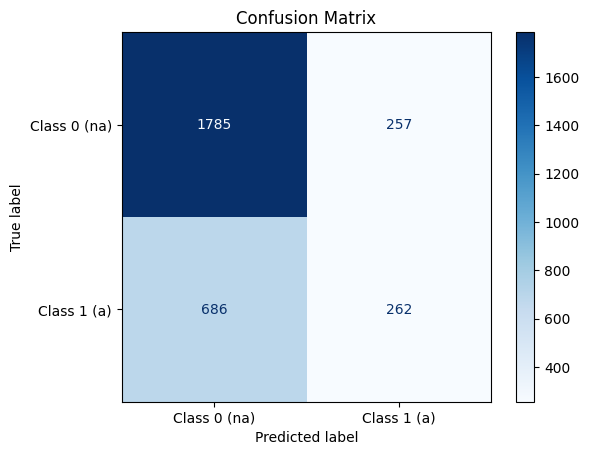

In [10]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0 (na)", "Class 1 (a)"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()